<a href="https://colab.research.google.com/github/KwameCode27/car-price-prediction/blob/main/Mobile_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Project Name**: *Mobile Price Prediction*

## **Project Type**:

### **Mobile Phone Price Predictor - Project Summary**  

---

## **Project Overview**  
The **Mobile Phone Price Predictor** is a machine learning project designed to predict the price of mobile phones based on their specifications and features. Using a dataset that includes details such as RAM, storage, battery capacity, camera specifications, and more, the model can estimate the price of a phone, helping users make informed purchasing decisions and assisting businesses with pricing strategies.  

---

## **Objectives**  
1. **Price Prediction:** Predict the price of mobile phones based on technical specifications.  
2. **Market Insights:** Analyze which features most influence price variations.  
3. **Recommendation System (Optional):** Suggest phones in specific price ranges based on preferences.  
4. **User-Friendly Deployment:** Provide predictions via an interactive interface or API.  

---

## **Dataset Details**  
- **Source:** Mobile phone specifications dataset.  
- **Size:** Includes multiple rows of mobile phone data.  
- **Features:**  
  - **Numerical Features:** RAM, storage, battery capacity, screen size, and resolution.  
  - **Categorical Features:** Brand, operating system, and color.  
  - **Target Variable:** Price (in cents).  

---

## **Key Steps**  
1. **Data Preprocessing:**  
   - Cleaned and standardized data.  
   - Handled missing values through mean/median imputation and encoding categorical features.  
2. **Feature Engineering:**  
   - Derived new features like **total pixels** (resolution width × height).  
   - Created indicators such as the **number of cameras**.  
3. **Model Training and Evaluation:**  
   - Tried multiple algorithms (Linear Regression, Decision Trees, and Random Forest).  
   - Evaluated models using metrics like **R² score**, **MAE**, and **MSE**.  
4. **Hyperparameter Tuning:**  
   - Optimized models for better accuracy.  
5. **Visualization:**  
   - Used plots to visualize feature importance and price trends.  
6. **Deployment (Optional):**  
   - Saved the trained model for deployment using Flask or FastAPI.  

---

## **Tools and Technologies Used**  
- **Programming Language:** Python  
- **Environment:** Google Colab  
- **Libraries:**  
  - **Data Analysis:** Pandas, NumPy  
  - **Visualization:** Matplotlib, Seaborn  
  - **Machine Learning Models:** Scikit-learn  
  - **Deployment (Optional):** Flask or FastAPI  

---

## **Results**  
- The best-performing model achieved an **R² score of ~0.85**, indicating a strong correlation between features and price.  
- Feature importance analysis showed that **RAM**, **storage**, and **camera quality** were the most influential predictors of price.  

---

## **Future Scope**  
1. **Enhanced Model Performance:** Experiment with deep learning models (e.g., neural networks).  
2. **Feature Expansion:** Include external market data, such as demand trends.  
3. **Recommendation System:** Develop a system for suggesting phones based on user preferences.  
4. **Deployment:** Build an interactive web or mobile app for real-time predictions.

**Let's Begin !**

Know Your Data


**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import missingno as msno
from sklearn.impute import KNNImputer
#from sklearn.metrics import

**Data Collection and Proccessing**

### Key Factors to Consider Based on Your Dataset:

1. **Brand and Model**  
   - **Brand**: Popularity and trustworthiness can affect predictions.  
   - **Model**: Specific models may have unique selling points.  

2. **Hardware Specifications**  
   - **Screen Size (inch)**: Larger screens might appeal to gamers and multimedia users.  
   - **Battery (mAh)**: Essential for long usage without charging.  
   - **Storage (GB)**: Impacts the ability to store files and apps.  
   - **RAM (GB)**: Determines performance for multitasking.  

3. **Camera Features**  
   - **Main Camera**: Number of cameras and megapixels for photography quality.  
   - **Selfie Camera (MP)**: Important for social media and video calls.  

4. **Display and Resolution**  
   - **Display Type**: AMOLED or Super AMOLED for high-quality visuals.  
   - **Resolution**: Higher resolution for clearer displays.  

5. **Software and Features**  
   - **Operating System (OS)**: Affects app compatibility and updates.  
   - **SD Card Support**: Expandable storage can attract budget-conscious buyers.  
   - **SIM Card Type**: Single vs. Dual SIM options for flexibility.  

6. **Design and Color**  
   - **Color**: Aesthetic preferences could influence buying decisions.  

7. **Price (¢)**  
   - Pricing is a critical factor for affordability and market segmentation.  

8. **Market and Location Data**  
   - **Region**: Helps identify trends in specific geographic areas.  
   - **Location**: Useful for regional marketing strategies.  

In [2]:
#loading the data from csv file using pandas dataframe
mobile_dataset = pd.read_csv('/content/Mobile-Phones.csv')

In [ ]:
#print first 5 rows of the dataset
mobile_dataset.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


In [ ]:
mobile_dataset.tail()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,Android,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,Android,Other,Ashanti,Kumasi Metropolitan,5.1,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.0,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.0,1020.0,4.0,NaN,NaN,299.0
3599,Apple,iPhone 13 Pro,no,1 Cameras: 12 MP,1170 x 2532,OLED,Single,IOS,Black,Greater Accra,Circle,5.1,3095.0,256.0,16.0,12.0,11500.0


In [ ]:
# checking the number of row and columns
mobile_dataset.shape

(3600, 17)

## The dataset has 3600 rows and 17 columns

In [ ]:
# some info about the dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3600 non-null   object 
 1   model              3600 non-null   object 
 2   sd_card            3600 non-null   object 
 3   main_camera        3365 non-null   object 
 4   resolution         3064 non-null   object 
 5   display            3034 non-null   object 
 6   sim_card           2810 non-null   object 
 7   os                 3381 non-null   object 
 8   color              3600 non-null   object 
 9   region             3600 non-null   object 
 10  location           3600 non-null   object 
 11  screen_size(inch)  3473 non-null   float64
 12  battery(mAh)       3430 non-null   float64
 13  storage(GB)        3597 non-null   float64
 14  ram(GB)            2812 non-null   float64
 15  selfie_camera(MP)  3293 non-null   float64
 16  price(¢)           3600 

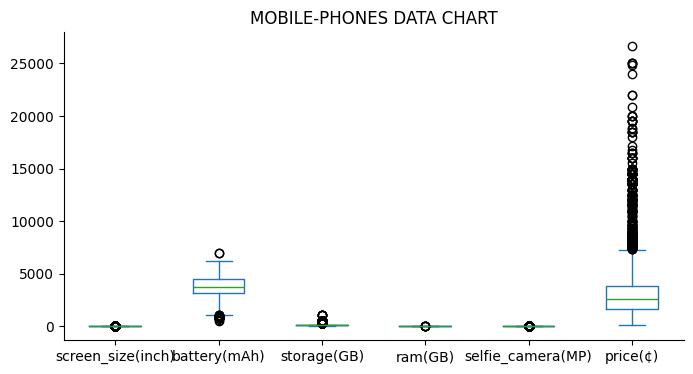

In [ ]:
mobile_dataset.plot(kind='box', figsize=(8, 4), title='MOBILE-PHONES DATA CHART')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# checking the missing values
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,235
resolution,536
display,566
sim_card,790
os,219
color,0
region,0


In [3]:
# checking the average values
mobile_dataset.isnull().sum()/mobile_dataset.shape[0]*100

,0
brand,0.000000
model,0.000000
sd_card,0.000000
main_camera,6.527778
resolution,14.888889
display,15.722222
sim_card,21.944444
os,6.083333
color,0.000000
region,0.000000


In [4]:
# finding duplicate
mobile_dataset.duplicated().sum()

246

In [6]:
# Identifying garbage values
mobile_dataset.isin(['?']).sum()

,0
brand,0
model,0
sd_card,0
main_camera,0
resolution,0
display,0
sim_card,0
os,0
color,0
region,0


In [7]:
# Encoding sim_card
mobile_dataset.replace({'sim_card':{'Single SIM': 1, 'Dual SIM': 0}}, inplace=True)

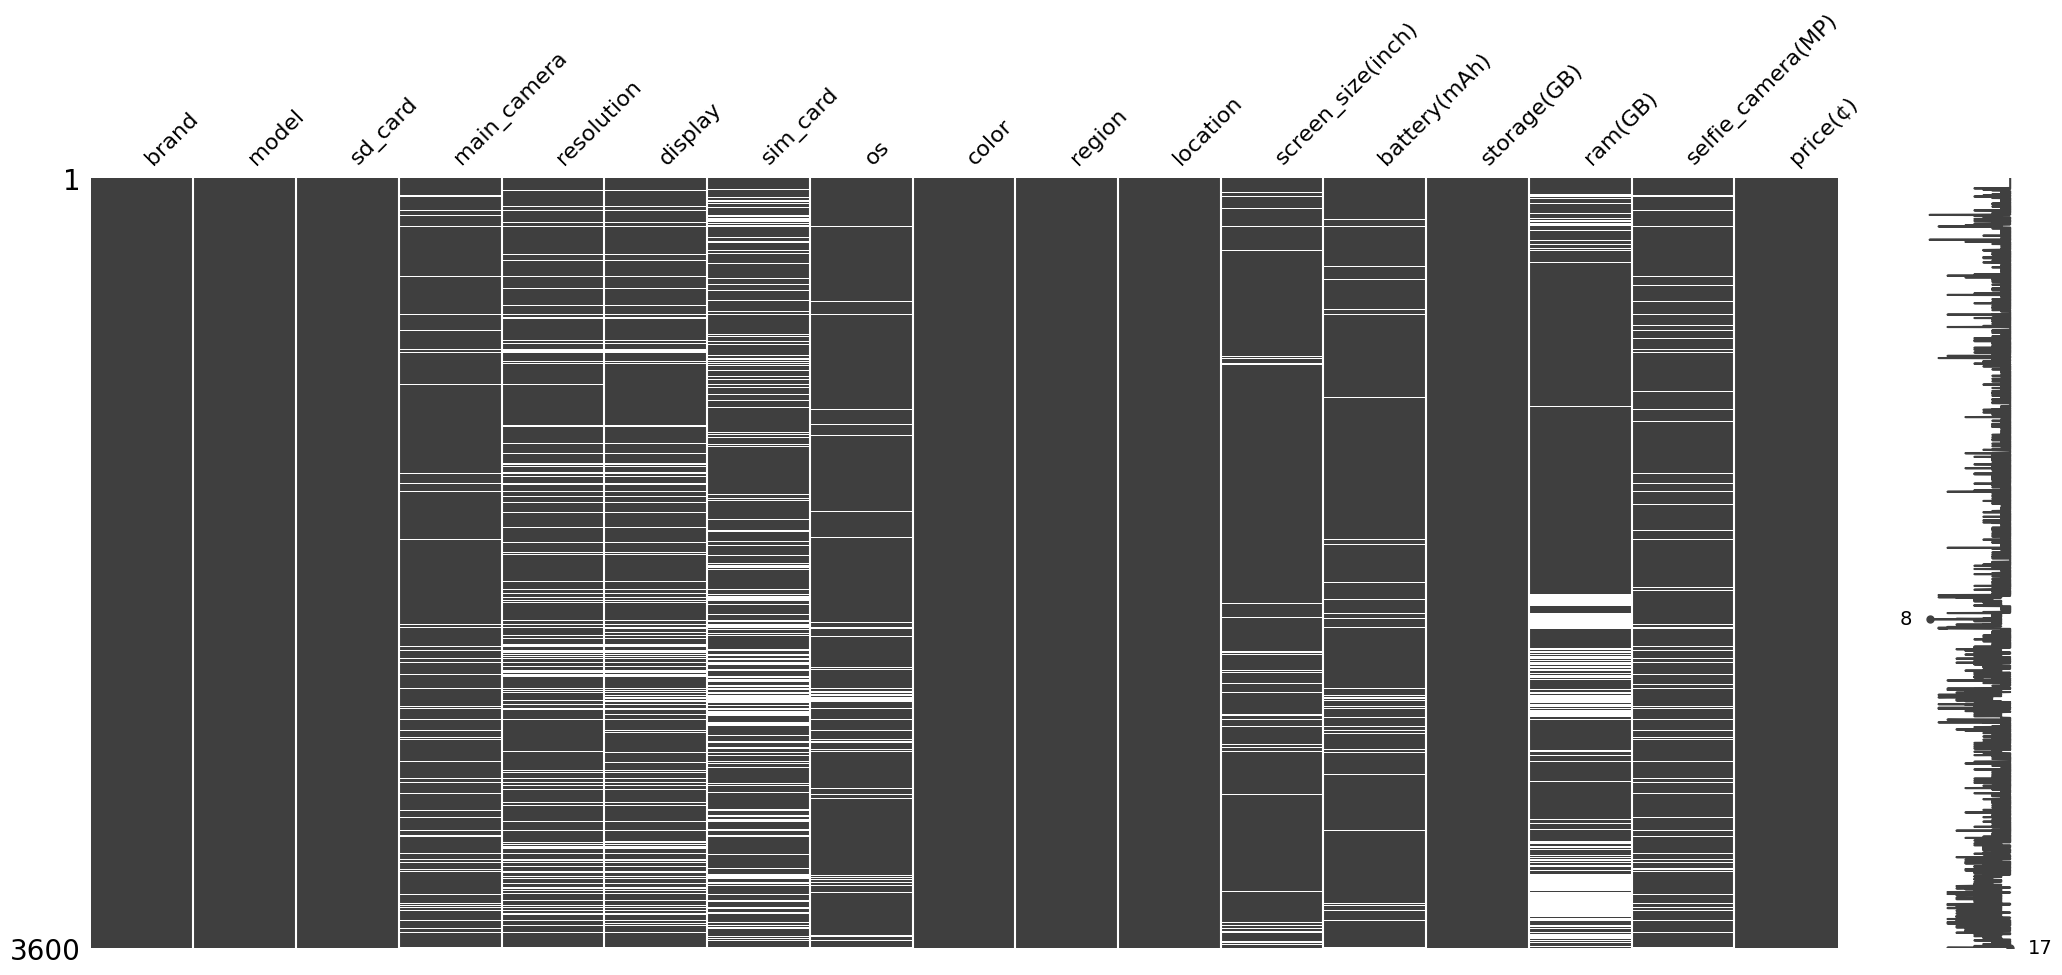

In [8]:
# Visualize missing data patterns
msno.matrix(mobile_dataset)
plt.show()

In [ ]:
mobile_dataset.describe()

,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
mean,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000
max,7.600000,7000.000000,1024.000000,16.000000,40.000000,26650.000000


In [ ]:
# Check the data types and basic statistics
mobile_dataset.dtypes

,0
brand,object
model,object
sd_card,object
main_camera,object
resolution,object
display,object
sim_card,object
os,object
color,object
region,object


Checking the Distribution of Categorial data

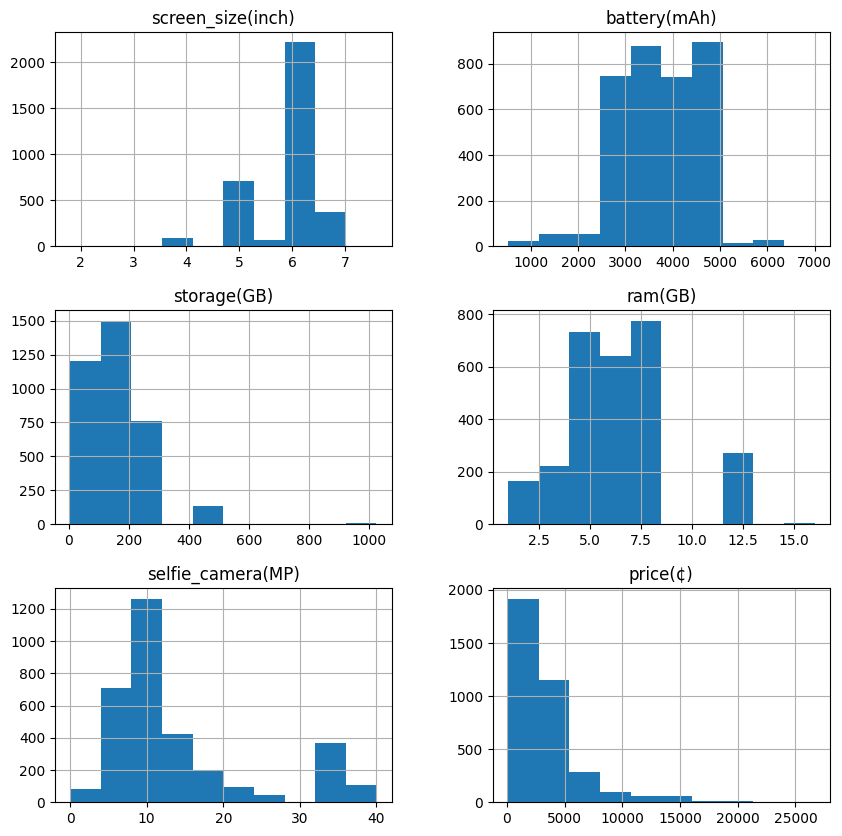

In [ ]:
# histogram of distribution of data
mobile_dataset.hist(figsize=(10,10))
plt.show()

In [ ]:
mobile_dataset.sd_card.value_counts()

,count
sd_card,
yes,1848
no,1752


In [ ]:
mobile_dataset.sim_card.value_counts()

,count
sim_card,
Dual,1140
Single,894
Nano-SIM,776


In [ ]:
# Encoding SD_Card
mobile_dataset.replace({'sd_card':{'Yes': 1, 'No': 0}}, inplace=True)

In [ ]:
# # Encoding sim_card
mobile_dataset.replace({'sim_card':{'Single SIM': 1, 'Dual SIM': 0}}, inplace=True)

In [ ]:
# # Encoding os
mobile_dataset.replace({'os':{'Android': 1, 'iOS': 0, 'Harmony':2, }}, inplace=True)

In [ ]:
mobile_dataset

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,1,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,1,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,1,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,1,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,1,Other,Ashanti,Kumasi Metropolitan,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.00,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.00,1020.0,4.0,NaN,NaN,299.0


Visualize Distribution of Price

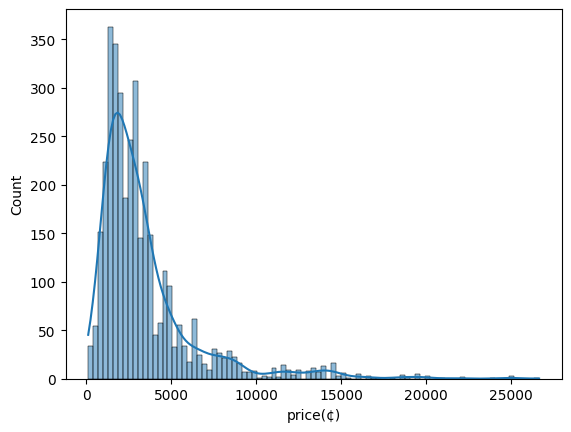

In [ ]:
sns.histplot(mobile_dataset['price(¢)'], kde=True)
plt.show()

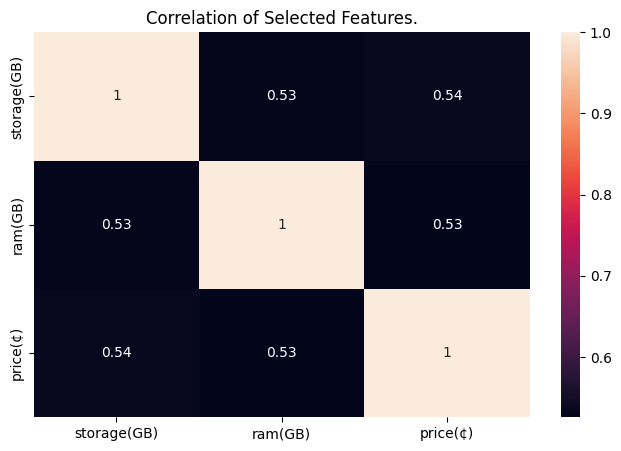

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(mobile_dataset[['storage(GB)','ram(GB)','price(¢)']].corr(), annot=True)
plt.title("Correlation of Selected Features.")
plt.show()

Handling missing data

Data Cleaning

In [ ]:
# Replace missing values with 0 (or other strategies)
mobile_dataset.fillna(0, inplace=True)

In [ ]:
mobile_dataset['screen_size(inch)'].fillna(mobile_dataset['screen_size(inch)'].mean(), inplace=True)

<ipython-input-31-bb73674a1f86>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobile_dataset['screen_size(inch)'].fillna(mobile_dataset['screen_size(inch)'].mean(), inplace=True)


In [ ]:
mobile_dataset['battery(mAh)'].fillna(mobile_dataset['battery(mAh)'].median(), inplace=True)

<ipython-input-32-211e96310db0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobile_dataset['battery(mAh)'].fillna(mobile_dataset['battery(mAh)'].median(), inplace=True)


In [ ]:
mobile_dataset['ram(GB)'].fillna(mobile_dataset['ram(GB)'].mode()[0], inplace=True)

<ipython-input-33-3507ec1521ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobile_dataset['ram(GB)'].fillna(mobile_dataset['ram(GB)'].mode()[0], inplace=True)


In [ ]:
mobile_dataset['selfie_camera(MP)'].fillna(mobile_dataset['selfie_camera(MP)'].mode()[0], inplace=True)

<ipython-input-34-ff8af98897a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobile_dataset['selfie_camera(MP)'].fillna(mobile_dataset['selfie_camera(MP)'].mode()[0], inplace=True)


In [ ]:
mobile_dataset['storage(GB)'].fillna(mobile_dataset['storage(GB)'].mode()[0], inplace=True)

<ipython-input-37-5b35d9d97b52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobile_dataset['storage(GB)'].fillna(mobile_dataset['storage(GB)'].mode()[0], inplace=True)


Split Data for Training and Testing

In [ ]:
# Define features and target variable
X = mobile_dataset.drop(['price(¢)', 'model','brand','sd_card','main_camera','resolution', 'display','sim_card','os','color','region','location'], axis=1)  # Drop non-numeric columns and target
y = mobile_dataset['price(¢)']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.dtypes

,0
screen_size(inch),float64
battery(mAh),float64
storage(GB),float64
ram(GB),float64
selfie_camera(MP),float64


In [ ]:
# checking the missing values
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,235
resolution,536
display,566
sim_card,790
os,219
color,0
region,0


In [ ]:
mobile_dataset.head()

,model,sd_card,main_camera,resolution,display,sim_card,region,location,screen_size(inch),battery(mAh),...,color_Green,color_Orange,color_Other,color_Pink,color_Purple,color_Red,color_Rose Gold,color_Silver,color_White,color_Yellow
0,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Greater Accra,Circle,6.10,3400.0,...,False,False,False,False,False,False,False,False,True,False
1,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Greater Accra,Circle,6.90,4500.0,...,False,False,False,False,False,False,False,False,False,False
2,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Greater Accra,Accra Metropolitan,6.40,5000.0,...,False,False,False,False,False,False,False,False,False,False
3,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Greater Accra,Accra Metropolitan,6.67,5000.0,...,False,False,False,False,False,False,False,False,False,False
4,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Greater Accra,Accra Metropolitan,6.80,5000.0,...,False,False,False,False,False,False,False,False,False,False


Training Machine Learning Model using linear regression

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Visualize Results

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

NameError: name 'y_pred' is not defined